In [7]:
import os
from os.path import exists
import pandas as pd
import numpy as np
from statistics import mean
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

wantFitness = True
calculateconvergence = False
# folders = ["FrontRearCrossover", "HighDimensionalGeneticAlgorithmToolboxCrossover", "HybridCrossover", "RingCrossover", "CollectiveCrossover"]
folders = ["FrontRearCrossover"]

# turn csv string to numbers
def fixFormat(df):
    df = df.drop( df[df['Repeat']=='Repeat'].index )
    df["Repeat"] = df["Repeat"].astype(int)
    df["Generation"] = df["Generation"].astype(int)
    df["F(x)"] = df["F(x)"].astype(float)
    
    if wantFitness is False:
        df["F(x)"] = -df["F(x)"]
        
    for i in range(df.shape[1]-2):
        df.iloc[:,i+2] = df.iloc[:,i+2].astype(float)
    return df


# calculateConvergenceGeneration, if difference smaller than 1.0e-6 then consider no different
def calculateConvergenceGeneration(df):
    result = []
    repeats = set(df["Repeat"])
    generations = sorted(set(df["Generation"]))
    generations.pop(0)
    for repeat in repeats:
        gene_count = 0
        for generation in generations:
            old_fx = df[(df["Repeat"] == repeat) & (df["Generation"] == generation-1)]["F(x)"].iloc[0]
            fx = df[(df["Repeat"] == repeat) & (df["Generation"] == generation)]["F(x)"].iloc[0]
            if abs(fx-old_fx) <= 1.0e-6:
                gene_count = gene_count + 1
            else:
                gene_count = 0
        result.append(generations[-1]-gene_count)
    return result

global_mins = {
    "SphereObjective": 0,
    "GeneralizedRastriginObjective": 0,
    "SchaffersF6Objective": 0,
    "GriewangksObjective": 0,
    "HansenObjective": -176.541793,
    "MichalewiczObjective": -1.8013,
}

# not sure
def calculateConvergenceRate(df, benchmark):
    result = []
    repeats = set(df["Repeat"])
    min_gen = min(df["Generation"])
    max_gen = max(df["Generation"])
    for repeat in repeats:
        gene_count = 0
        gen_min_fx = df[(df["Repeat"] == repeat) & (df["Generation"] == min_gen)]["F(x)"].iloc[0]
        gen_max_fx = df[(df["Repeat"] == repeat) & (df["Generation"] == max_gen)]["F(x)"].iloc[0]
        result.append(abs(gen_max_fx - global_mins[benchmark]) / abs(gen_min_fx - global_mins[benchmark]))
    print(np.max(result))
    print(np.min(result))
    print(sum(result) / len(result))

# get set of crossovers and benchmarks from folder
def getLists(files):
    crossovers = set()
    benchmarks = set()
    for file in files:
        crossovers.add(file.split("+")[0])
        benchmarks.add(file.split("+")[1].split(".")[0])
    return crossovers, benchmarks

def compareResultBetweenCrossover(df, crossover1, crossover2, stat):
    crossover1_win = 0
    crossover1_tie = 0
    for column in result.columns:
        if result.loc[crossover1, stat][column] < result.loc[crossover2, stat][column]:
            crossover1_win = crossover1_win + 1
        elif result.loc[crossover1, stat][column] == result.loc[crossover2, stat][column]:
            crossover1_tie = crossover1_tie + 1
            print(column)
    return crossover1_win, crossover1_tie, len(result.columns) - crossover1_win - crossover1_tie

if wantFitness:
    print("F(x) is fitness value")
else:
    print("F(x) is formula result")
    
if calculateconvergence:
    print("calculate convergence needed")
else:
    print("calculate convergence disabled")

F(x) is fitness value
calculate convergence disabled


FrontRearCrossover-2+OneMaxObjective.csv


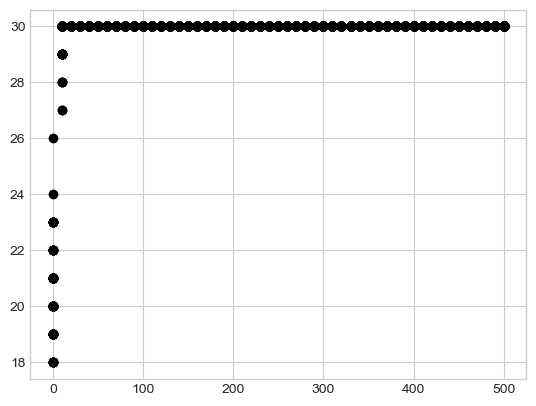

FrontRearCrossover-2+TrapFiveObjective.csv


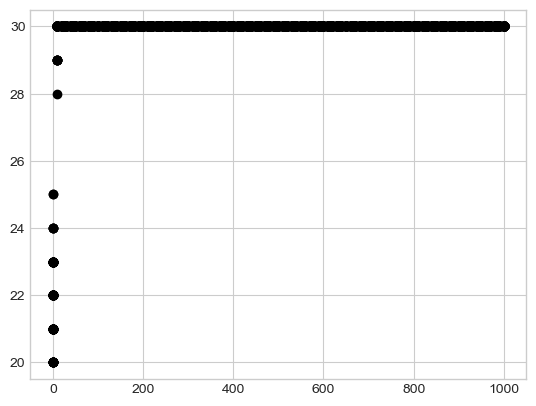

FrontRearCrossover-2+TrapThreeObjective.csv


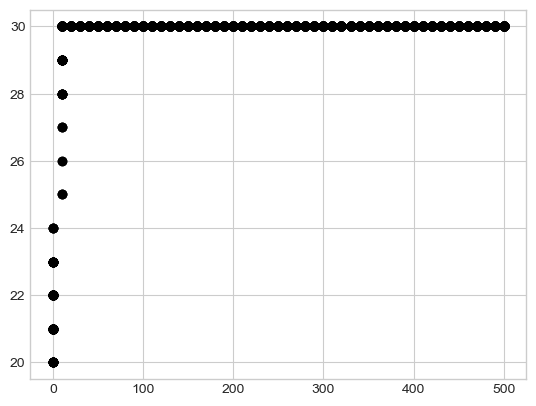

FrontRearCrossover-2+ZeroMaxObjective.csv


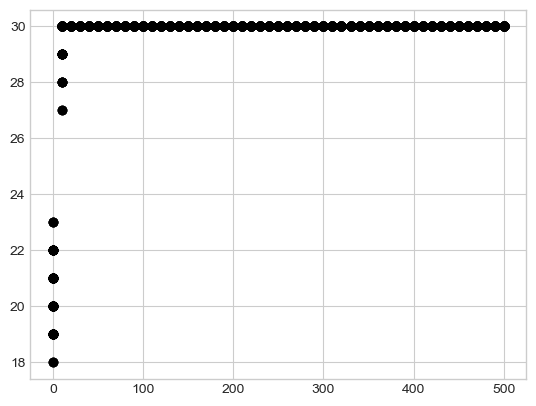

FrontRearCrossover-4+OneMaxObjective.csv


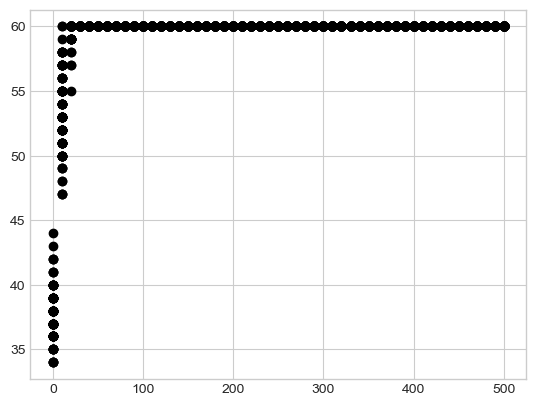

FrontRearCrossover-4+TrapFiveObjective.csv


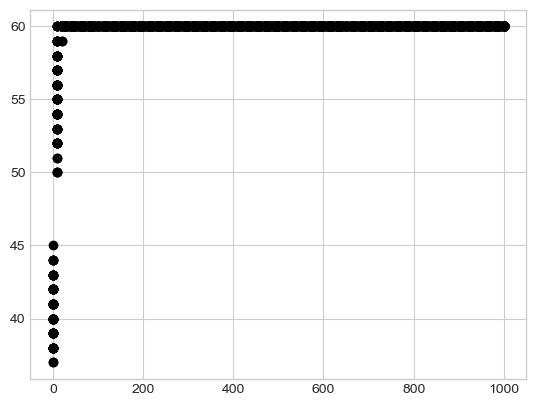

FrontRearCrossover-4+TrapThreeObjective.csv


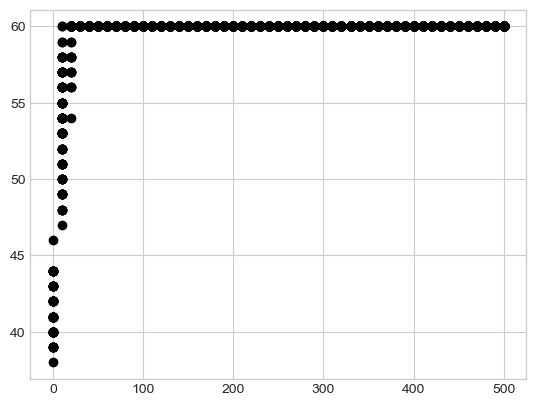

FrontRearCrossover-4+ZeroMaxObjective.csv


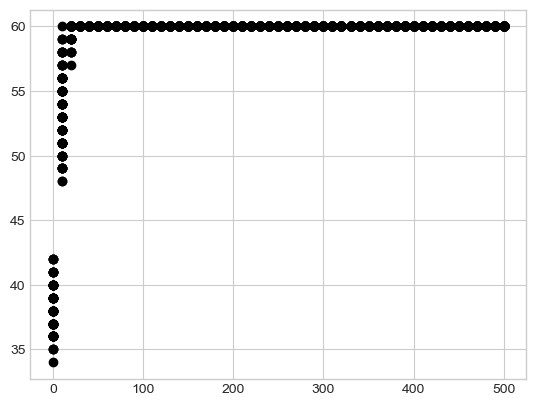

FrontRearCrossover-8+OneMaxObjective.csv


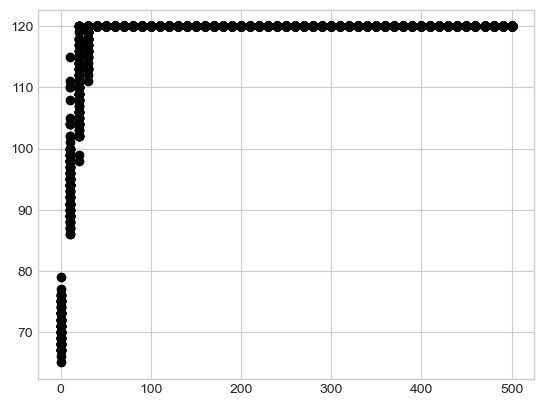

FrontRearCrossover-8+TrapFiveObjective.csv


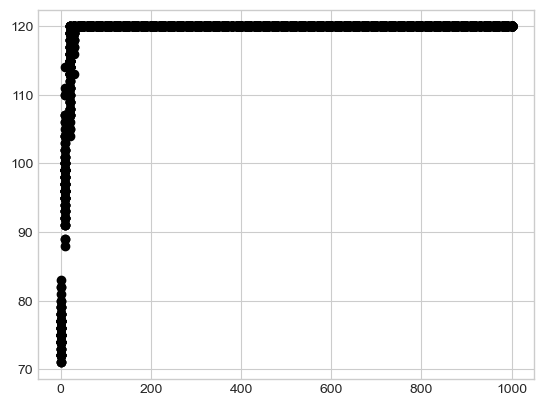

FrontRearCrossover-8+TrapThreeObjective.csv


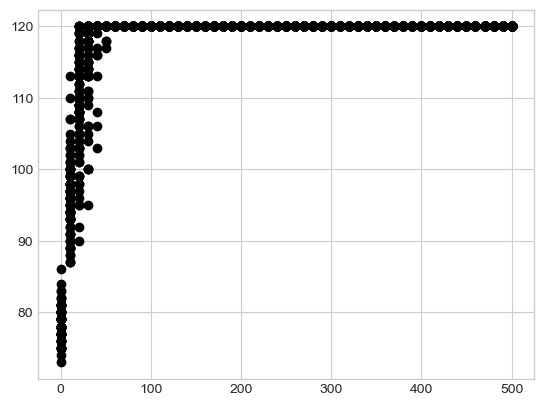

FrontRearCrossover-8+ZeroMaxObjective.csv


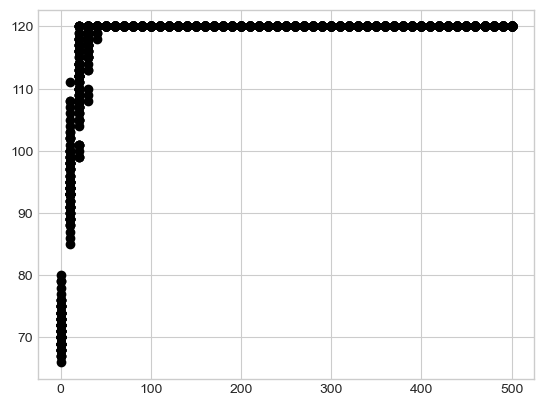

P1XO-2+OneMaxObjective.csv


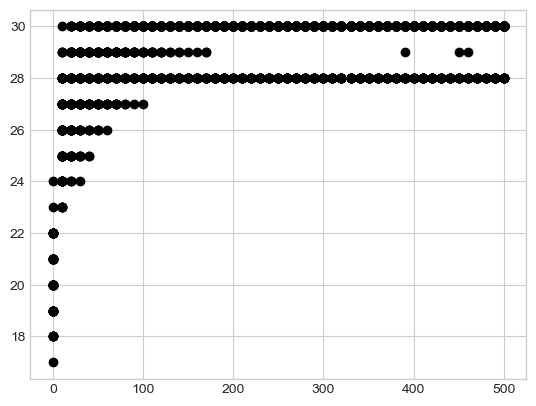

P1XO-2+TrapFiveObjective.csv


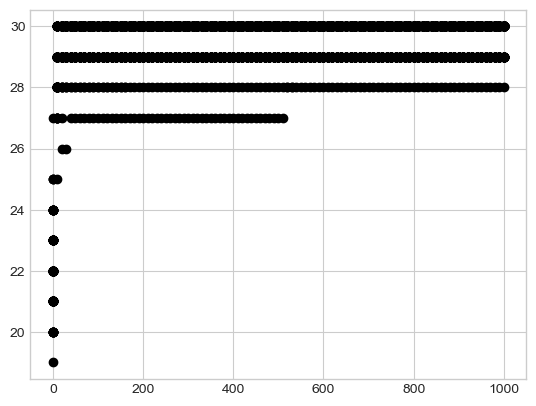

P1XO-2+TrapThreeObjective.csv


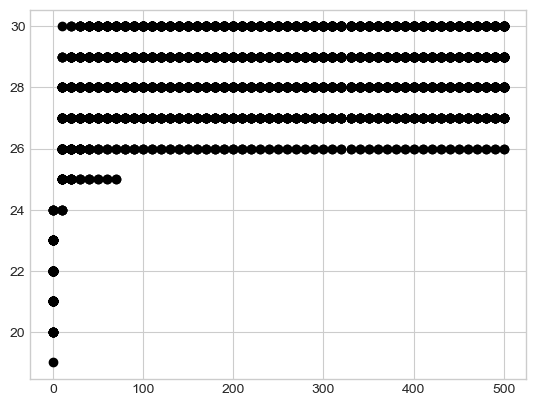

P1XO-2+ZeroMaxObjective.csv


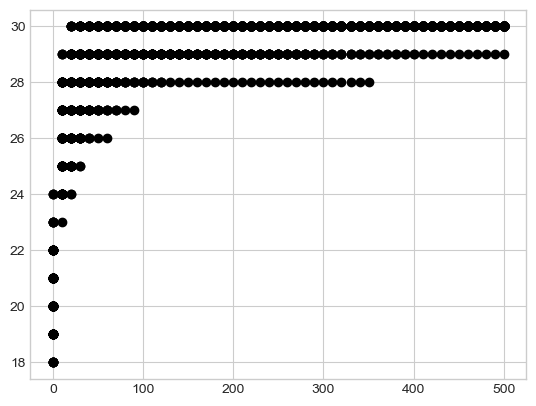

P1XO-4+OneMaxObjective.csv


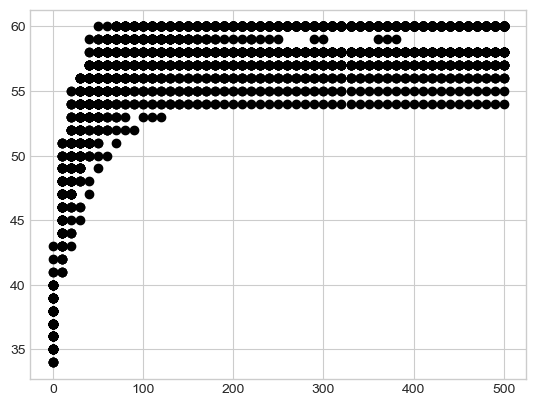

P1XO-4+TrapFiveObjective.csv


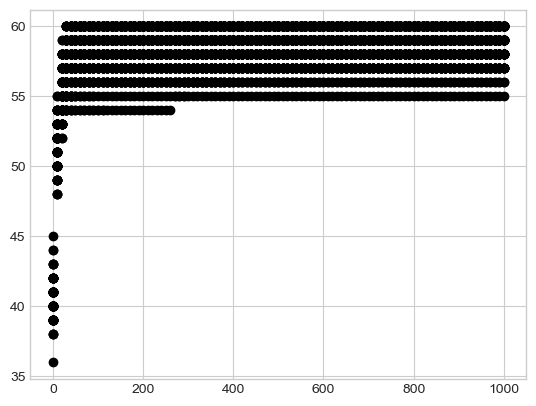

P1XO-4+TrapThreeObjective.csv


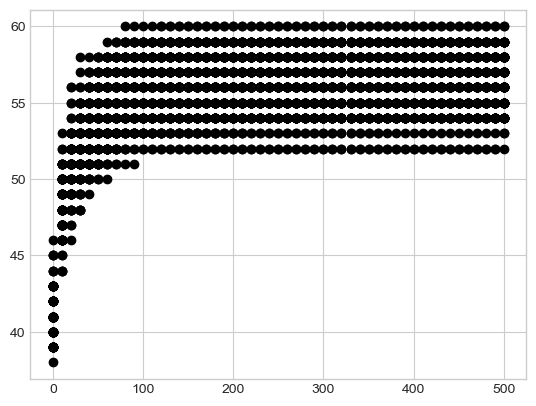

P1XO-4+ZeroMaxObjective.csv


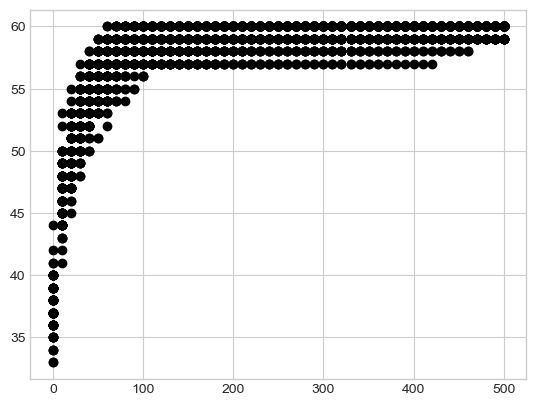

P1XO-8+OneMaxObjective.csv


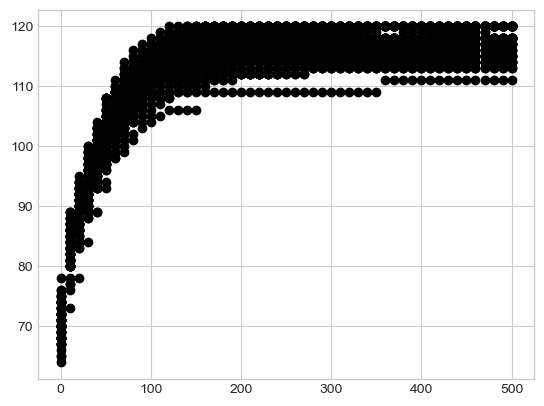

P1XO-8+TrapFiveObjective.csv


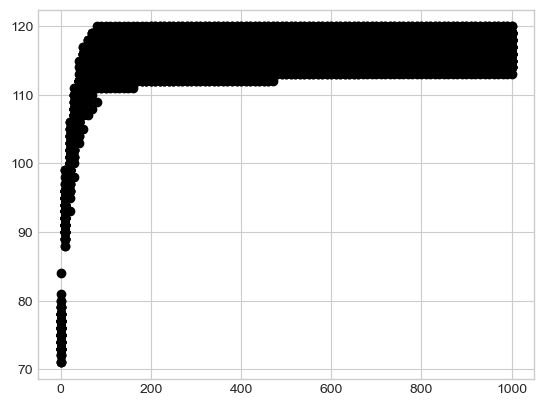

P1XO-8+TrapThreeObjective.csv


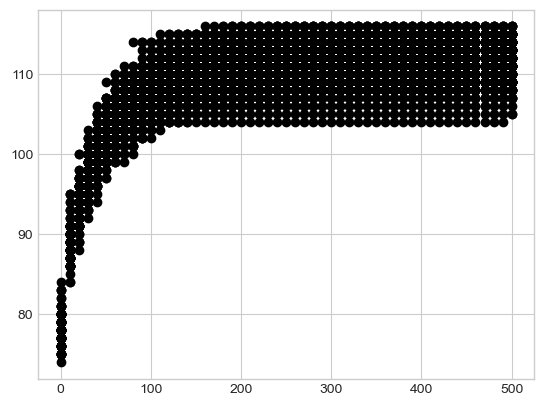

P1XO-8+ZeroMaxObjective.csv


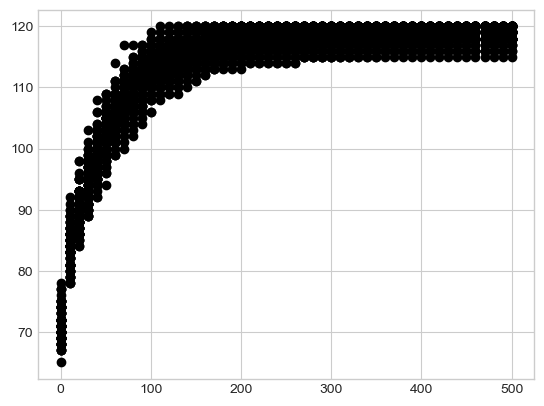

P2XO-2+OneMaxObjective.csv


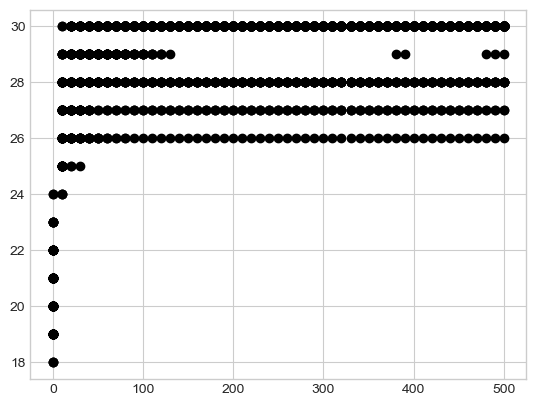

P2XO-2+TrapFiveObjective.csv


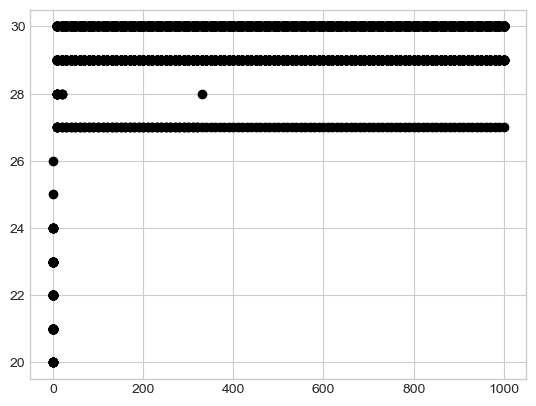

P2XO-2+TrapThreeObjective.csv


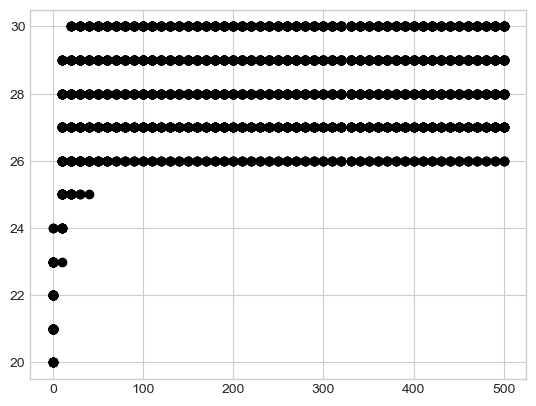

P2XO-2+ZeroMaxObjective.csv


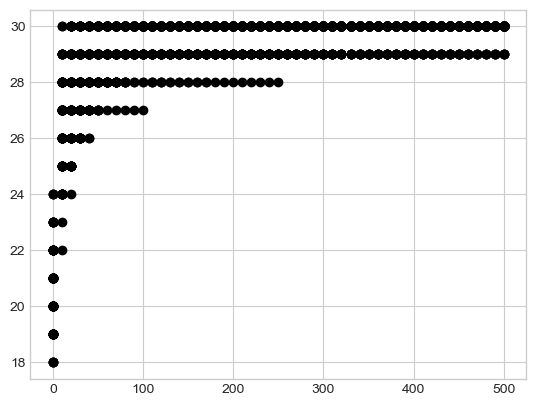

P2XO-4+OneMaxObjective.csv


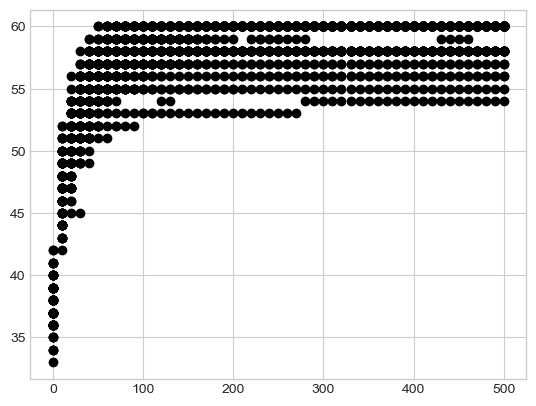

P2XO-4+TrapFiveObjective.csv


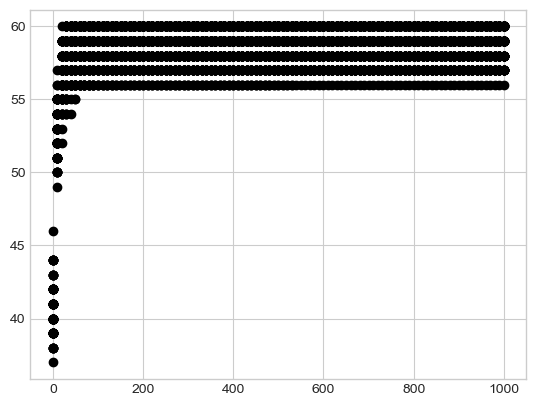

P2XO-4+TrapThreeObjective.csv


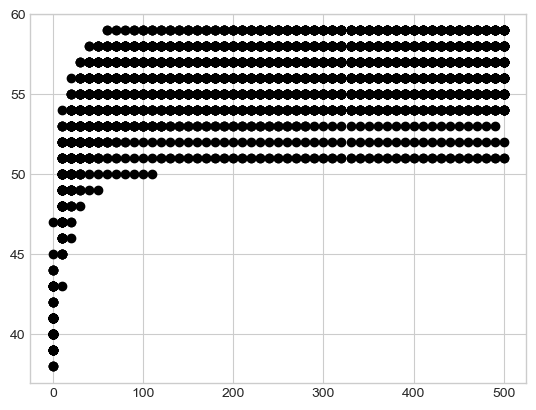

P2XO-4+ZeroMaxObjective.csv


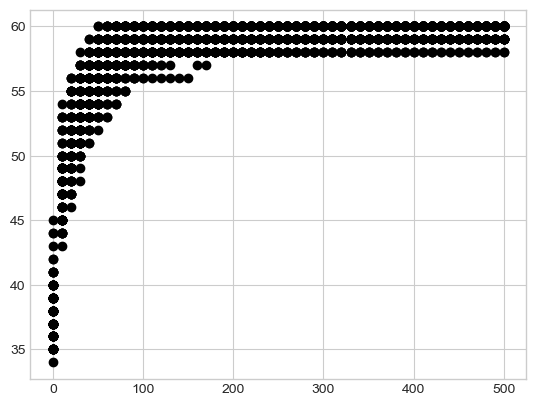

P2XO-8+OneMaxObjective.csv


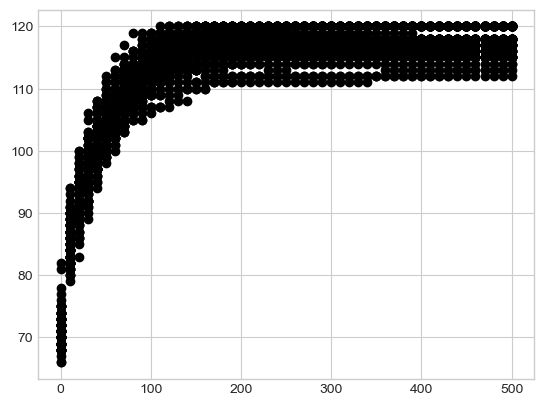

P2XO-8+TrapFiveObjective.csv


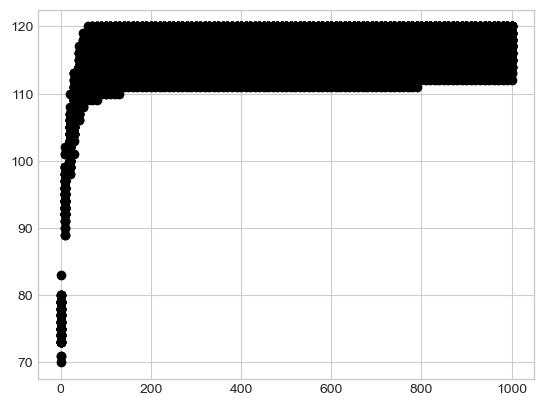

P2XO-8+TrapThreeObjective.csv


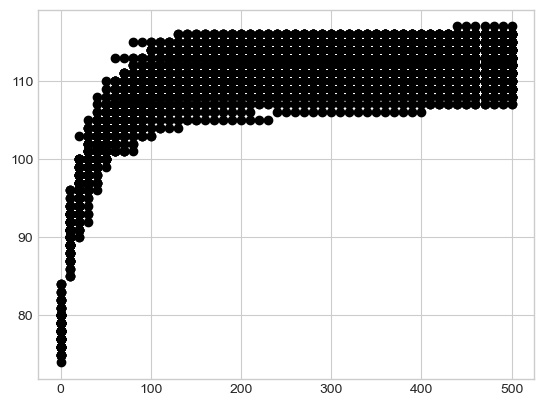

P2XO-8+ZeroMaxObjective.csv


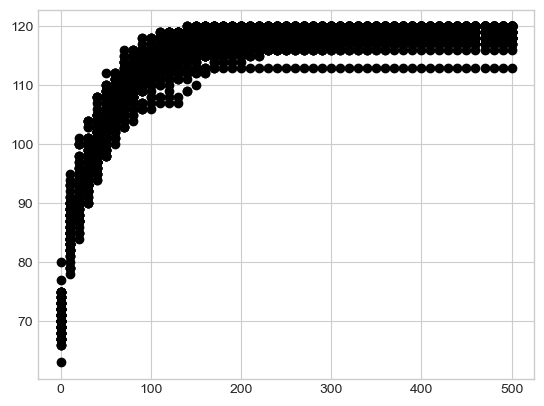

RingCrossover-2+OneMaxObjective.csv


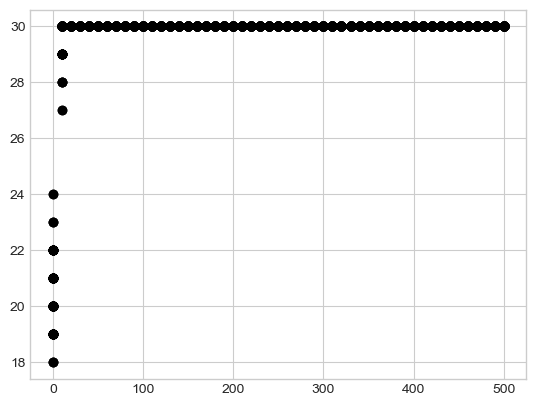

RingCrossover-2+TrapFiveObjective.csv


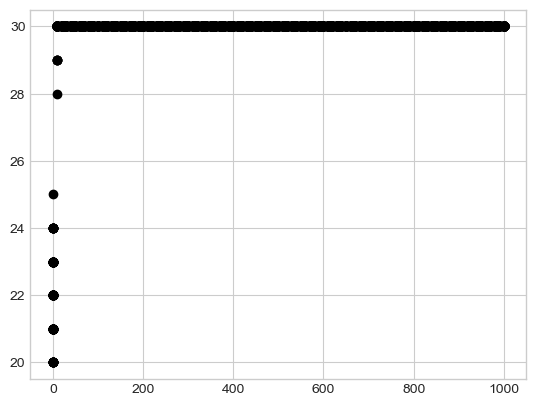

RingCrossover-2+TrapThreeObjective.csv


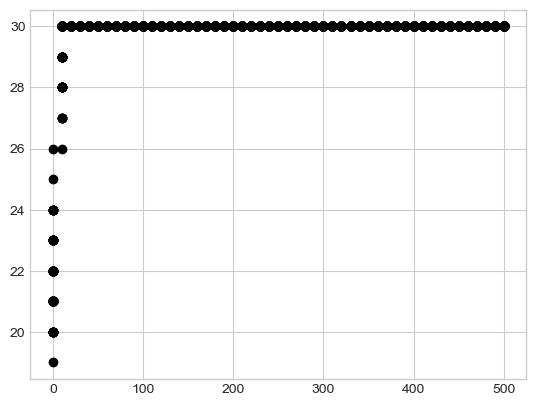

RingCrossover-2+ZeroMaxObjective.csv


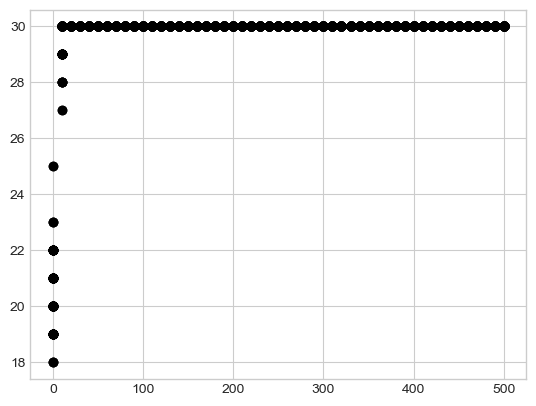

RingCrossover-4+OneMaxObjective.csv


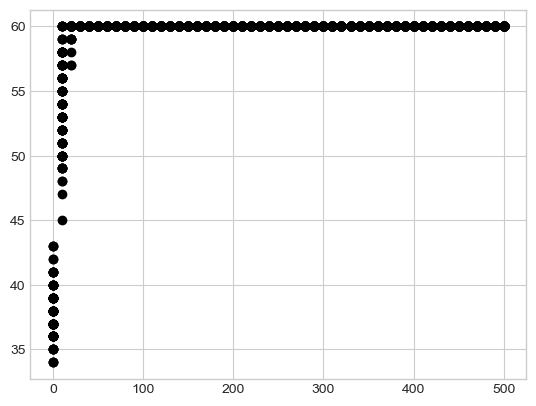

RingCrossover-4+TrapFiveObjective.csv


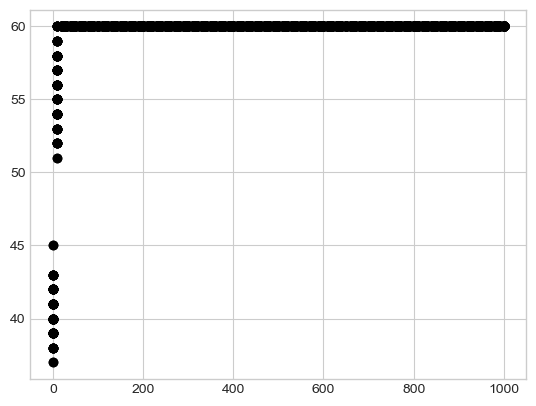

RingCrossover-4+TrapThreeObjective.csv


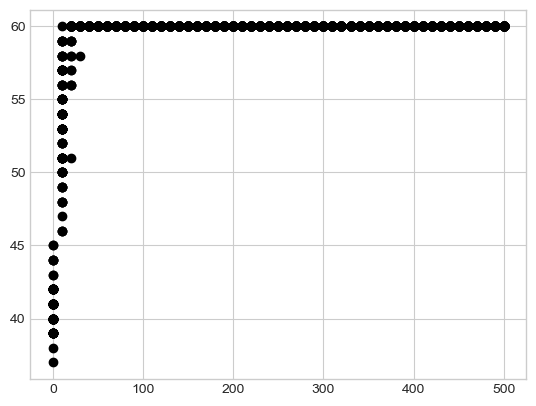

RingCrossover-4+ZeroMaxObjective.csv


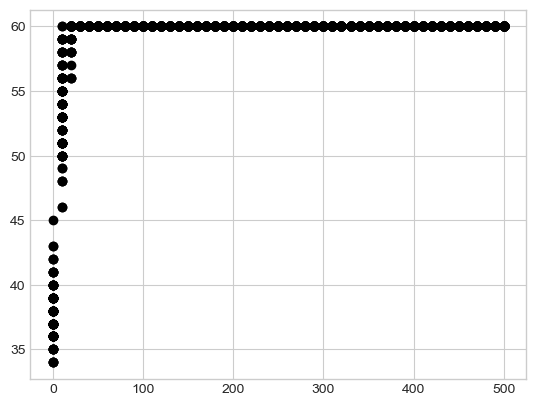

RingCrossover-8+OneMaxObjective.csv


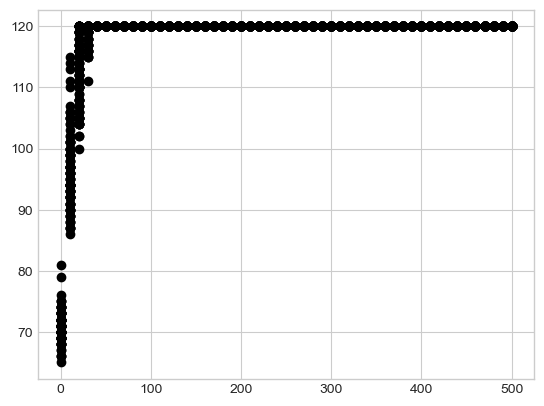

RingCrossover-8+TrapFiveObjective.csv


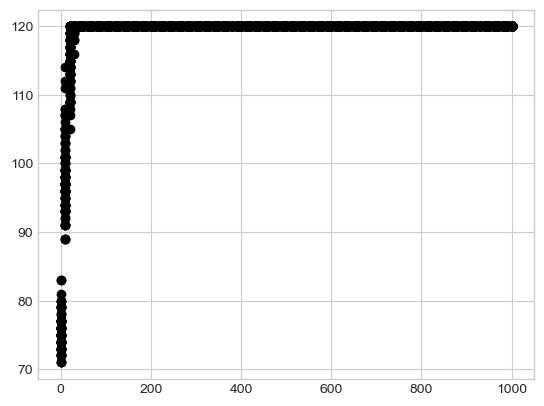

RingCrossover-8+TrapThreeObjective.csv


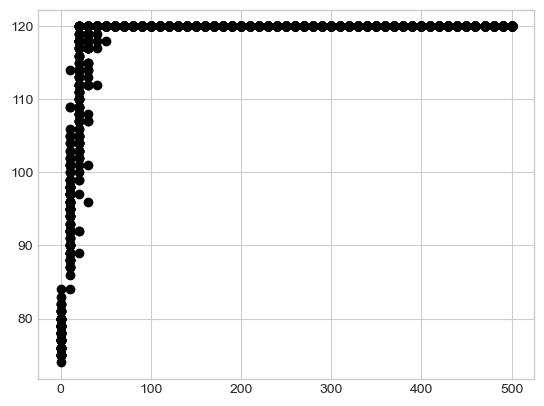

RingCrossover-8+ZeroMaxObjective.csv


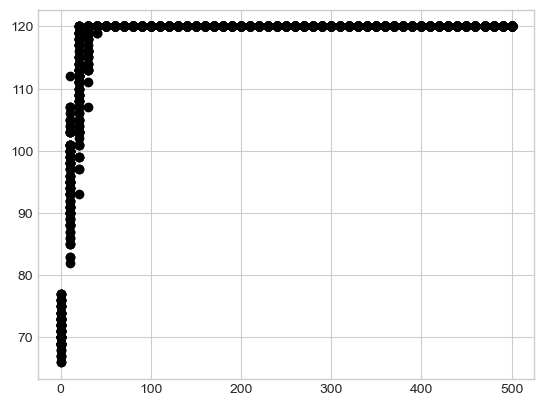

UniformCrossover-2+OneMaxObjective.csv


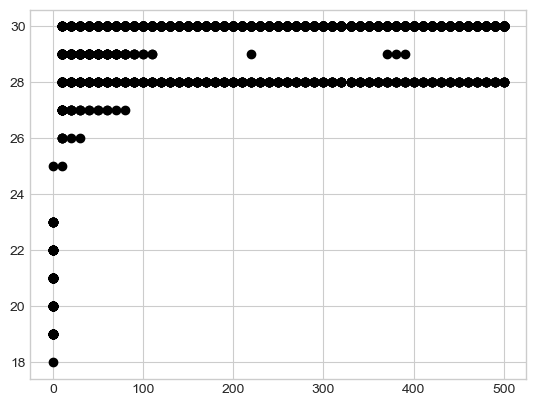

UniformCrossover-2+TrapFiveObjective.csv


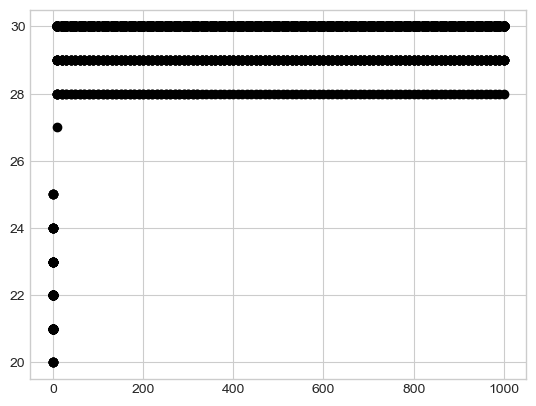

UniformCrossover-2+TrapThreeObjective.csv


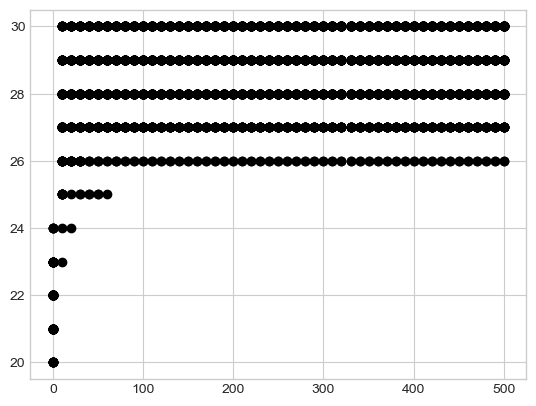

UniformCrossover-2+ZeroMaxObjective.csv


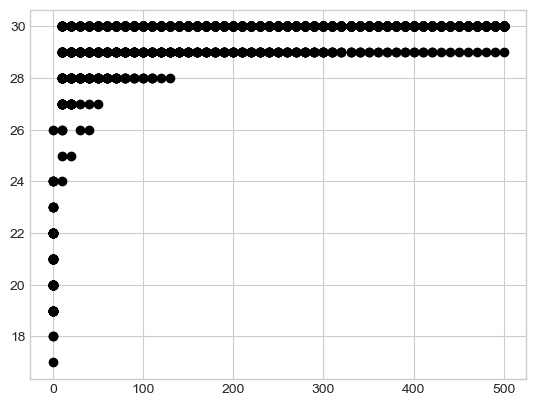

UniformCrossover-4+OneMaxObjective.csv


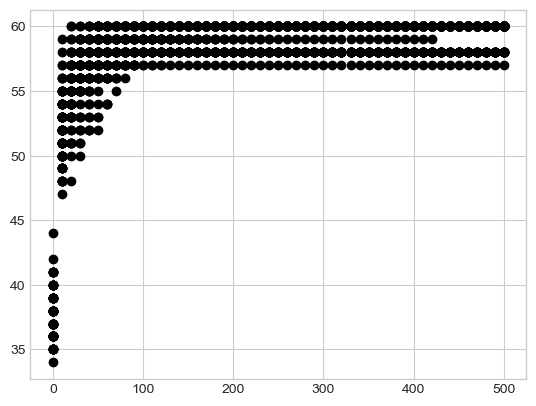

UniformCrossover-4+TrapFiveObjective.csv


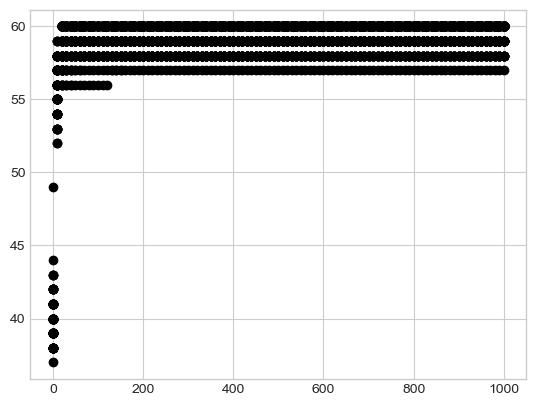

UniformCrossover-4+TrapThreeObjective.csv


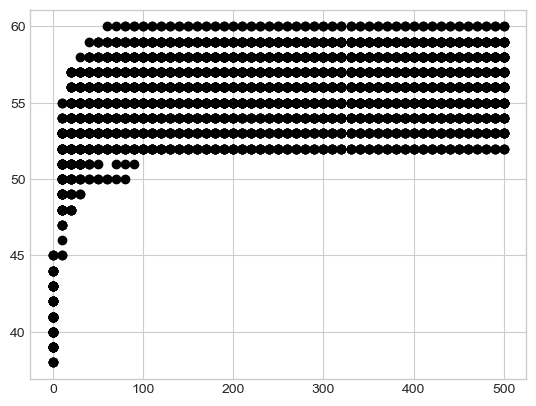

UniformCrossover-4+ZeroMaxObjective.csv


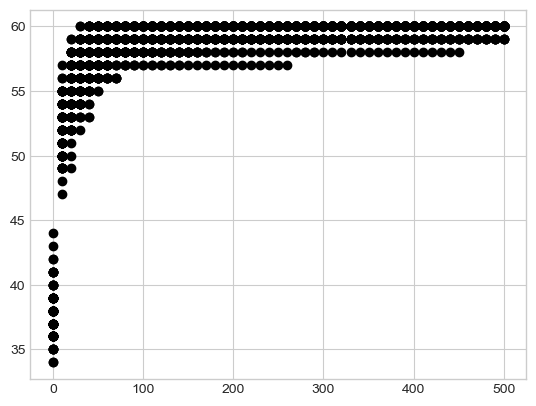

UniformCrossover-8+OneMaxObjective.csv


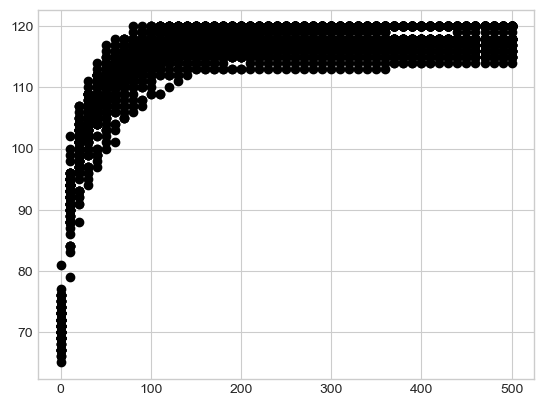

UniformCrossover-8+TrapFiveObjective.csv


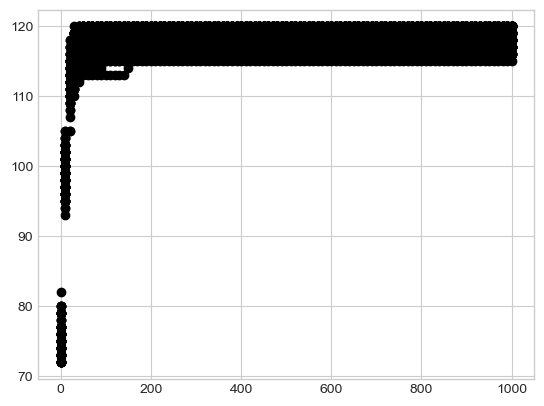

UniformCrossover-8+TrapThreeObjective.csv


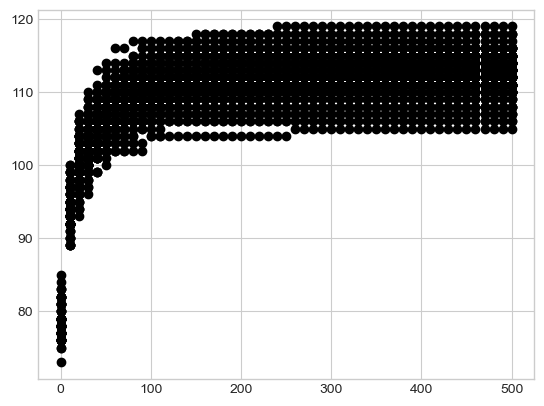

UniformCrossover-8+ZeroMaxObjective.csv


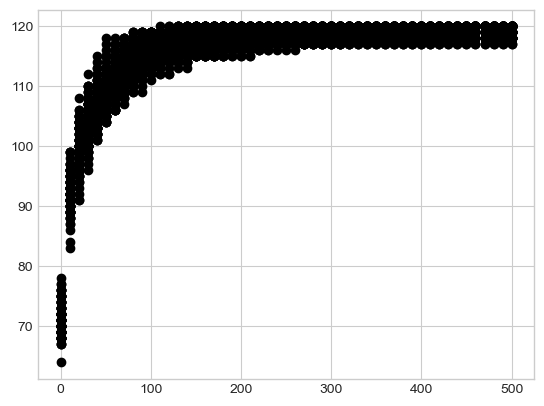

------------------------------
                          TrapThreeObjective OneMaxObjective ZeroMaxObjective  \
crossover            stat                                                       
P2XO-8               mean             112.13          118.38           119.41   
RingCrossover-8      mean              120.0           120.0            120.0   
FrontRearCrossover-8 mean              120.0           120.0            120.0   
UniformCrossover-4   mean              56.41           59.69            59.96   
UniformCrossover-8   mean             112.35          118.85           119.51   
FrontRearCrossover-4 mean               60.0            60.0             60.0   
RingCrossover-4      mean               60.0            60.0             60.0   
P1XO-2               mean              28.81            29.8            29.99   
RingCrossover-2      mean               30.0            30.0             30.0   
P2XO-2               mean              28.66           29.77            29.96 

In [8]:
for folder in folders:
    for subdir, dirs, files in os.walk(folder):
        crossovers, benchmarks = getLists(files)
        stats = ["mean"]
        iterables = [crossovers, stats]
        result = pd.DataFrame(columns = benchmarks, index = pd.MultiIndex.from_product(iterables, names=["crossover", "stat"]))
        
        for file in files:
            crossover = file.split("+")[0]
            benchmark = file.split("+")[1].split(".")[0]
            df = pd.read_csv(folder+"/"+file, index_col=False)
            df = fixFormat(df)
            
            
            temp_result = {}
            if calculateconvergence:
#                 calculateConvergenceRate(df, benchmark)
                convergence = calculateConvergenceGeneration(df)
                temp_result["mean"] = sum(convergence) / len(convergence)
                temp_result["max"] = np.max(convergence)
                temp_result["min"] = np.min(convergence)
            else:
                temp_result["mean"] = df.groupby("Generation")["F(x)"].mean()[df["Generation"].max()]
                temp_result["max"] = df.groupby("Generation")["F(x)"].max()[df["Generation"].max()]
                temp_result["min"] = df.groupby("Generation")["F(x)"].min()[df["Generation"].max()]
                
            for stat in stats:
                result.loc[crossover, stat][benchmark] = temp_result[stat]
            if "Objective" in benchmark:
                print(file)
                plt.plot(df["Generation"], df["F(x)"], 'o', color='black')
                plt.show()
        print("-" * 30)
        print(result)
        
#         win, tie, lose = compareResultBetweenCrossover(df, "CollectiveCrossover-30", "P1XO-30", "mean")
#         print(str(win) + " : " + str(tie) + " : " + str(lose))
#         win, tie, lose = compareResultBetweenCrossover(df, "CollectiveCrossover-30", "P2XO-30", "mean")
#         print(str(win) + " : " + str(tie) + " : " + str(lose))